# Dati CCS

In [16]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import dask 
import random
import glob



## Percorsi

questi sono i percorsi su cui lavorea questo script

In [11]:
# origin path
pathDEST = '/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_smoothed'
pathCOARS =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened'


In [12]:
# se non esiste creo la cartella
if not os.path.exists(pathDEST):
    os.makedirs(pathDEST)

In [13]:
year = 1998
pathCOARS + '/' + str(year) + '/*.nc'

'/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened/1998/*.nc'

In [19]:
for year in range(1998, 2023):
    print(year)
    # read in the data
    print(pathCOARS + str(year) + '/*.nc')
    ds = xr.open_mfdataset(pathCOARS + '/' + str(year) + '/*.nc', combine='by_coords')
    
    # smooth data
    ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(lat=3, center=True, min_periods=1).mean().rolling(lon=3, center=True, min_periods=1).mean()
    ds_3w = ds_smooth.rolling(time=21, center=True, min_periods=1).mean()
    
    # compute the relative value
    #ds_smooth_rel = ds_3w / ds_3w.max(dim='time')
    
    # append to a new dataset
    if year == 1998:
        ds_smooth_tot = ds_3w
    else:
        ds_smooth_tot = xr.concat([ds_smooth_tot, ds_3w], dim='time')

1998
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened1998/*.nc
1999
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened1999/*.nc
2000
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2000/*.nc
2001
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2001/*.nc
2002
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2002/*.nc
2003
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2003/*.nc
2004
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2004/*.nc
2005
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2005/*.nc
2006
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2006/*.nc
2007
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2007/*.nc
2008
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2008/*.nc
2009
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coarsened2009/*.nc
2010
/mnt/d/Dropbox/R_projects/SV_phenology/data/CDS/daily_coars

In [20]:
ds_smooth_tot

<xarray.Dataset>
Dimensions:       (lat: 312, lon: 440, time: 6124)
Coordinates:
  * lat           (lat) float64 84.98 84.94 84.9 84.85 ... 72.1 72.06 72.02
  * lon           (lon) float64 -4.938 -4.813 -4.688 ... 49.69 49.81 49.94
  * time          (time) datetime64[ns] 1998-03-01 1998-03-02 ... 2022-10-31
Data variables:
    MERIS_nobs    (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    MODISA_nobs   (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    OLCI-A_nobs   (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    OLCI-B_nobs   (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    SeaWiFS_nobs  (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    VIIRS_nobs    (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    chlor_a       (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
    crs           (time) float64 dask.array<chunksize=(42,), meta=np.ndarray>
    total_nobs    (time, lat, lon) float32 dask.array<chunksize=(42, 311, 439), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20220517T132630Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_start:            199803010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    b96aba32-fe16-4850-b3f1-84a72901a6de
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...
    summary:                        Data products generated for C3S using the...

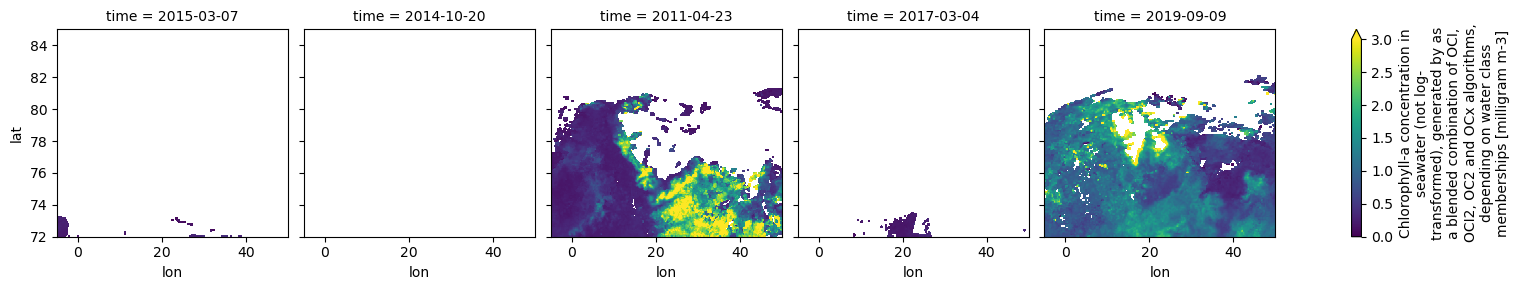

In [29]:
ds_smooth_tot.sel(time=random.sample(list(ds_smooth_tot.time.values), 5)).chlor_a.plot(col='time', col_wrap=5, vmin=0, vmax=3)


In [27]:
# media per giorno dell'anno
ave_smooth_tot = ds_smooth_tot.groupby('time.dayofyear').mean(dim='time')


In [30]:
ave_smooth_tot.to_netcdf(pathDEST + '/daily_smoothed.nc')


In [31]:
# divido il valore di ogni giorno per il massimo di quel pixel
ave_smooth_tot_rel = ave_smooth_tot / ave_smooth_tot.max(dim='dayofyear')
ave_smooth_tot_rel.to_netcdf(pathDEST + '/CDS_daily_smoothed_rel.nc')


/home/matzuc/miniconda3/envs/geo/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


questo è il ciclo che scarica e pre-processa tutti i file

In [32]:
for year in range(1998, 2023):
    # creo una cartella per ogni anno
    pathDEST_year = pathDEST + '/' + str(year)
    if not os.path.exists(pathDEST_year):
        os.makedirs(pathDEST_year)
        
    for month in range(3, 11):
        
        # seleziono i dati per il mese e l'anno
        ds_month_year = ds_smooth_tot.sel(time=(ds_smooth_tot.time.dt.year == year) & (ds_smooth_tot.time.dt.month == month))
        
        #salvo il file mensile
        ds_month_year.to_netcdf(pathDEST_year + '/' + 'CDS_smoothed_' + str(year) + '_' + str(month) + '.nc')
        
        print('saved ' + str(year) + '_' + str(month) + '.nc')
        
        


saved 1998_3.nc
saved 1998_4.nc
saved 1998_5.nc
saved 1998_6.nc
saved 1998_7.nc
saved 1998_8.nc
saved 1998_9.nc
saved 1998_10.nc
saved 1999_3.nc
saved 1999_4.nc
saved 1999_5.nc
saved 1999_6.nc
saved 1999_7.nc
saved 1999_8.nc
saved 1999_9.nc
saved 1999_10.nc
saved 2000_3.nc
saved 2000_4.nc
saved 2000_5.nc
saved 2000_6.nc
saved 2000_7.nc
saved 2000_8.nc
saved 2000_9.nc
saved 2000_10.nc
saved 2001_3.nc
saved 2001_4.nc
saved 2001_5.nc
saved 2001_6.nc
saved 2001_7.nc
saved 2001_8.nc
saved 2001_9.nc
saved 2001_10.nc
saved 2002_3.nc
saved 2002_4.nc
saved 2002_5.nc
saved 2002_6.nc
saved 2002_7.nc
saved 2002_8.nc
saved 2002_9.nc
saved 2002_10.nc
saved 2003_3.nc
saved 2003_4.nc
saved 2003_5.nc
saved 2003_6.nc
saved 2003_7.nc
saved 2003_8.nc
saved 2003_9.nc
saved 2003_10.nc
saved 2004_3.nc
saved 2004_4.nc
saved 2004_5.nc
saved 2004_6.nc
saved 2004_7.nc
saved 2004_8.nc
saved 2004_9.nc
saved 2004_10.nc
saved 2005_3.nc
saved 2005_4.nc
saved 2005_5.nc
saved 2005_6.nc
saved 2005_7.nc
saved 2005_8.nc
s